# Part II - (Ford GoBike System Bike Duration Analysis)
## by (Bochaberi Daisy)

## Investigation Overview

My investigation is focused on the dependency on bike trip duration on the user. I analyze bike usage duration per gender, daily bike usage duration and weekly bike usage duration based on whether the user is a customer or a subscriber.


## Dataset Overview

The dataset contains:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type
- Member gender
- Member Birthday Year
- Bike Share


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata-clean.csv')

## Ford GoBike User Bike Usage in February 2019

Generally, Customers have a high bike duration usage with the other gender having the highest bike usage. Subscriber bike usage is the most stable compared to that of customers.

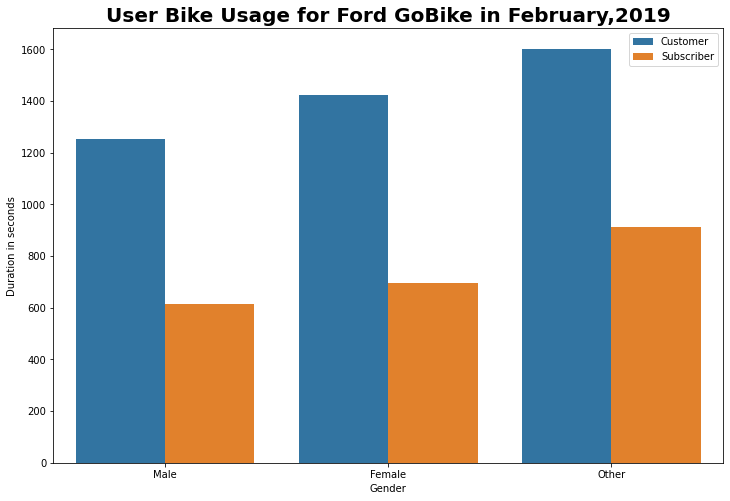

In [3]:
user_gender=df.member_gender.value_counts()
plt.figure(figsize=(12,8))
chart = sb.barplot(data=df, x='member_gender', y='duration_sec', order=user_gender.index, errorbar=None, hue='user_type');
chart.legend()
plt.title('User Bike Usage for Ford GoBike in February,2019',fontsize=20,fontweight="bold")
plt.xlabel('Gender')
plt.ylabel('Duration in seconds');

## Ford GoBike Daily Bike Usage in February 2019

Customers bike usage duration is shorter compared to subscribers. Subscribers tend to hire bikes for longer periods.

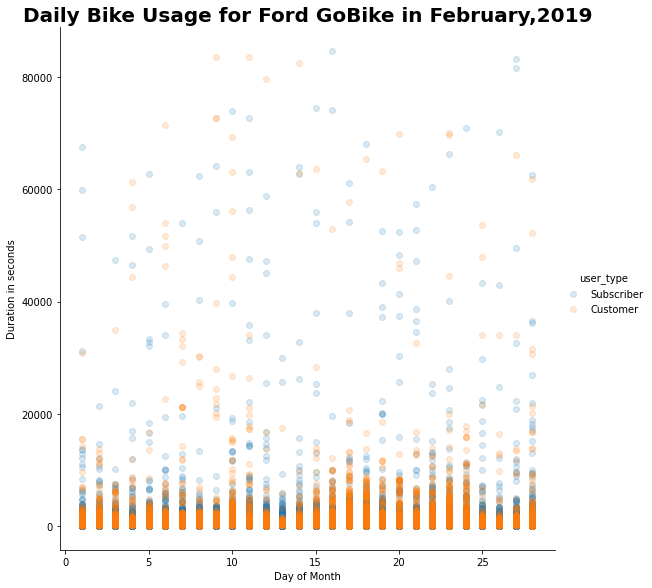

In [4]:
day = sb.FacetGrid(data = df, hue = 'user_type', hue_order = ['Subscriber','Customer'],height=8);
day.map(plt.scatter, 'day_of_month','duration_sec', alpha = 1/6)
day.add_legend()
plt.title('Daily Bike Usage for Ford GoBike in February,2019',fontsize=20,fontweight="bold")
plt.xlabel('Day of Month')
plt.ylabel('Duration in seconds');

## Ford GoBike Weekly Bike Usage in February 2019

Customers have a flexible use of the service while subscribers have a stable use of the service. The service is used on the weekdays more than the weekends

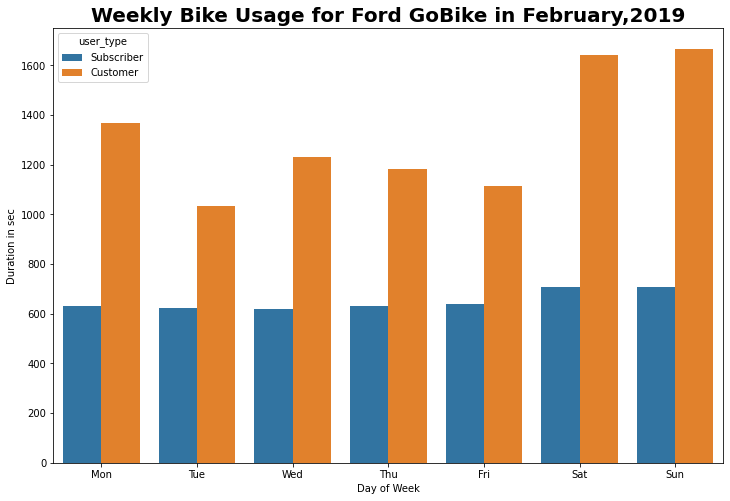

In [5]:
day_name = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.figure(figsize=(12,8))
sb.barplot(data=df, x='start_day_of_week', y='duration_sec', order=day_name 
           ,hue = 'user_type', hue_order = ['Subscriber','Customer'],errorbar=None);
plt.title('Weekly Bike Usage for Ford GoBike in February,2019',fontsize=20,fontweight="bold")
plt.xlabel('Day of Week')
plt.ylabel('Duration in sec');

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt